In [122]:
import pandas as pd 
import sqlite3 as sql
from sqlalchemy import create_engine
from sqlalchemy import inspect
from datetime import datetime 

In [123]:
# Import CSV file in Google Colab 
from google.colab import files
uploaded = files.upload()

import io
WQ_Big_Lake_df = pd.read_csv(io.BytesIO(uploaded['Big_Lake_Sammamish.csv']))
WQ_Big_Lake_df.head(5)

Saving Big_Lake_Sammamish.csv to Big_Lake_Sammamish (2).csv


,Unnamed: 0,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [124]:
# Group by Collect Date 
WQ_Big_Lake_df_mean = WQ_Big_Lake_df.groupby(["CollectDate"]).mean()
WQ_Big_Lake_df_mean.head(5)

,Unnamed: 0,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,,
1994-01-06,4624.576923,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,4629.269231,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,4633.961538,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,4638.653846,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,4643.346154,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


In [125]:
#Rename Ammmonia_Nitrogen to Ammonia_Nitrogen
WQ_Big_Lake_df_mean.rename({'Ammmonia Nitrogen (mg/L)':'Ammonia Nitrogen (mg/L)'},axis='columns',inplace=True)
WQ_Big_Lake_df_mean.head()

,Unnamed: 0,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,,
1994-01-06,4624.576923,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,4629.269231,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,4633.961538,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,4638.653846,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,4643.346154,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


In [126]:
# Drop Unnamed column 
WQ_Big_Lake_df_mean.drop('Unnamed: 0',axis=1, inplace=True)
WQ_Big_Lake_df_mean

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.020000,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.020000,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.020000,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.020000,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.020000,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162
...,...,...,...,...,...,...,...,...,...,...,...
2008-08-12,0.010225,105.050697,7.320584,0.301205,0.157227,0.002000,7.737486,14.903599,0.359512,0.011660,56.549591
2008-09-09,0.010517,106.652152,6.879816,0.000000,0.121392,0.002000,7.608944,14.918261,0.307881,0.009120,44.952373
2008-10-14,0.020665,107.218508,6.308638,0.335366,0.107646,0.005746,7.378440,13.285642,0.282699,0.014873,45.426235


In [127]:
#Create the database
conn = sql.connect('King_County_WQI.db')
c = conn.cursor()

In [128]:
#Table of Parameters for King County Big Lakes 
create_sql="CREATE TABLE IF NOT EXISTS Big_Lake_Sammamish (collectdate INTEGER, Ammonia_Nitrogen INTEGER, Conductivity INTEGER, Dissolved_Oxygen INTEGER, Fecal_Coliform INTEGER, Nitrate_Nitrite INTEGER, Orthophosphate_Phosphate INTEGER, pH INTEGER, Temperature INTEGER, Total_Nitrogen INTEGER, Total_Phosphorous INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)




In [129]:
# INSERTING VALUES
#DataFrame all at once 
WQ_Big_Lake_df_mean.to_sql(name="Big_Lake_Sammamish", con=conn, if_exists="replace",index=False)
WQ_Big_Lake_df_mean.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


In [130]:
#Table for WQI in the Excellent Range
create_sql= "CREATE TABLE IF NOT EXISTS Excellent_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [131]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Excellent_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [132]:
# WQI in the Excellent Range 
cursor=c.execute('''
SELECT collectdate,WQI
FROM Excellent_Range_WQI
WHERE WQI BETWEEN 91 and 100
ORDER BY WQI;''')
for row in cursor:
  print(row)

('1998-07-06', 91.23099676796963)
('2004-06-07', 91.8580358012221)
('2007-06-12', 92.3498112513325)
('2005-03-08', 93.58189989008396)
('2001-01-31', 93.68051149466275)
('1999-08-03', 94.26117327952251)
('2006-12-05', 95.02475040299761)
('1995-06-05', 95.20619184950446)
('2003-02-05', 95.75116416977947)
('2002-05-07', 96.24208418120371)
('2005-01-04', 97.42433698602602)
('1994-05-24', 97.99220161241098)
('2008-01-15', 98.12387074762304)
('1994-05-03', 98.63320107664369)
('2008-03-12', 98.69206039317045)
('2003-05-06', 98.98292651107826)
('2004-05-03', 99.25960291705347)


In [133]:
#Table for WQI in the Good Range
create_sql= "CREATE TABLE IF NOT EXISTS Good_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [134]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Good_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [135]:
# WQI in the Good Range 
c.execute('''
SELECT collectdate,WQI
FROM Good_Range_WQI 
WHERE WQI BETWEEN 76 and 90
ORDER BY WQI;''')
for row in cursor:
  print(row)

In [136]:
#Table for WQI in the Fair Range
create_sql= "CREATE TABLE IF NOT EXISTS Fair_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [137]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Fair_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [138]:
# WQI in the Fair Range 
c.execute('''
SELECT collectdate,WQI
FROM Fair_Range_WQI
WHERE WQI BETWEEN 51 and 75
ORDER BY WQI;''')
for row in cursor:
  print(row)



In [139]:
#Table for WQI in the Poor Range
create_sql= "CREATE TABLE IF NOT EXISTS Poor_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [140]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Poor_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [141]:
# WQI in the Poor Range 
c.execute('''
SELECT collectdate,WQI
FROM Poor_Range_WQI
WHERE WQI BETWEEN 26 and 50
ORDER BY WQI;''')
for row in cursor:
  print(row)


In [142]:
#Table for WQI in the Very Poor Range
create_sql= "CREATE TABLE IF NOT EXISTS Very_Poor_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [143]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Very_Poor_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [144]:
# WQI in the Very Poor Range 
c.execute('''
SELECT collectdate,WQI
FROM Very_Poor_Range_WQI
WHERE WQI BETWEEN 0 and 25
ORDER BY WQI;''')
for row in cursor:
  print(row)





In [145]:
# correlation among the features of each features in the data frame.
corr_matrix = WQ_Big_Lake_df_mean.corr()
round(corr_matrix,2)

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammonia Nitrogen (mg/L),1.00,0.17,-0.48,0.11,-0.32,0.23,-0.26,0.16,-0.28,0.39,-0.22
Conductivity (µmhos/cm),0.17,1.00,-0.42,-0.04,-0.57,-0.22,0.00,0.35,-0.53,-0.13,-0.57
Dissolved Oxygen (mg/L),-0.48,-0.42,1.00,-0.03,0.75,0.03,0.27,-0.64,0.73,-0.01,0.72
Fecal Coliform (CFU/100ml),0.11,-0.04,-0.03,1.00,0.14,0.49,-0.42,-0.30,0.13,0.44,0.17
Nitrate Nitrite (mg/L),-0.32,-0.57,0.75,0.14,1.00,0.32,0.03,-0.62,0.96,0.21,0.99
Orthophosphate Phosphate (mg/L),0.23,-0.22,0.03,0.49,0.32,1.00,-0.58,-0.53,0.26,0.63,0.37
pH,-0.26,0.00,0.27,-0.42,0.03,-0.58,1.00,0.38,0.08,-0.43,-0.01
Temperature (°C),0.16,0.35,-0.64,-0.30,-0.62,-0.53,0.38,1.00,-0.59,-0.41,-0.63
Total Nitrogen (mg/L),-0.28,-0.53,0.73,0.13,0.96,0.26,0.08,-0.59,1.00,0.24,0.96
Total Phosphorus (mg/L),0.39,-0.13,-0.01,0.44,0.21,0.63,-0.43,-0.41,0.24,1.00,0.30


In [146]:
# Looking for the correlations between WQI and rest of the features
corr_matrix = WQ_Big_Lake_df_mean.corr()
round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.99
Total Nitrogen (mg/L)              0.96
Dissolved Oxygen (mg/L)            0.72
Orthophosphate Phosphate (mg/L)    0.37
Total Phosphorus (mg/L)            0.30
Fecal Coliform (CFU/100ml)         0.17
pH                                -0.01
Ammonia Nitrogen (mg/L)           -0.22
Conductivity (µmhos/cm)           -0.57
Temperature (°C)                  -0.63
Name: WQI, dtype: float64

In [147]:
WQI_df_1 = WQ_Big_Lake_df.drop(columns=["CollectDate"])
WQI_df_1.head()



,Unnamed: 0,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,2,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,3,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,4,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [148]:
WQI_df_1.drop('Unnamed: 0',axis=1, inplace=True)
WQI_df_1.head(5)

,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [149]:
WQI_df_1["WQI"] = round(WQI_df_1["WQI"],2)

In [150]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [151]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf

In [152]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

X = WQI_df_1.drop(["WQI"],1).values
y = WQI_df_1["WQI"].values.reshape(-1,1)


# To check the number of shapes
print(X.shape)
print(y.shape)

# To check the first five entries
print(y[:5])

(9513, 10)
(9513, 1)
[[ 94.89]
 [ 98.7 ]
 [101.55]
 [ 98.72]
 [ 98.72]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [153]:
# Create a StandardScaler instances
scaler_X = skl.preprocessing.StandardScaler()
scaler_y = skl.preprocessing.StandardScaler()

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Fit the scaler
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Scale the data
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)
y_train
y_test

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(7134, 10)
(7134, 1)
(2379, 10)
(2379, 1)


In [154]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 10
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="linear"))


# Check the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer="adam", metrics=["mse"])
model.compile(loss='mean_squared_error', optimizer="adam")

In [156]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
223/223 [==============================] - 1s 3ms/step - loss: 7928.0039 - val_loss: 3635.6638
Epoch 2/100
223/223 [==============================] - 1s 4ms/step - loss: 1193.6956 - val_loss: 541.2147
Epoch 3/100
223/223 [==============================] - 1s 3ms/step - loss: 514.2446 - val_loss: 384.5218
Epoch 4/100
223/223 [==============================] - 1s 3ms/step - loss: 396.1054 - val_loss: 291.0537
Epoch 5/100
223/223 [==============================] - 1s 3ms/step - loss: 315.3409 - val_loss: 227.5296
Epoch 6/100
223/223 [==============================] - 1s 3ms/step - loss: 256.8492 - val_loss: 181.6651
Epoch 7/100
223/223 [==============================] - 1s 3ms/step - loss: 207.3726 - val_loss: 143.0613
Epoch 8/100
223/223 [==============================] - 1s 4ms/step - loss: 166.9938 - val_loss: 115.0670
Epoch 9/100
223/223 [==============================] - 1s 4ms/step - loss: 134.1008 - val_loss: 87.3539
Epoch 10/100
223/223 [==============================]

In [157]:
# Making predictions using the testing data.
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print(y_pred)

75/75 [==============================] - 0s 2ms/step
(2379, 1)
[[ 94.86723 ]
 [ 71.20449 ]
 [ 99.677574]
 ...
 [164.61824 ]
 [ 48.239815]
 [110.98888 ]]


In [158]:
print(y_test)

[[ 94.93]
 [ 71.04]
 [ 99.44]
 ...
 [164.89]
 [ 47.9 ]
 [111.03]]


In [159]:
y_pred_new = []
for i in y_pred:
    y_pred_new.append(i[0])
    
y_test_new = []
for i in y_test:
    y_test_new.append(i[0])

In [160]:
import pandas as pd

accuracy_df = pd.DataFrame({"Prediction":y_pred_new, "Actual":y_test_new})
accuracy_df.head(20)

,Prediction,Actual
0,94.867233,94.93
1,71.204491,71.04
2,99.677574,99.44
3,211.909348,212.42
4,166.556488,166.89
5,81.593750,81.42
6,183.329666,183.53
7,66.994629,66.86
8,91.901329,92.20
9,99.224190,98.94


In [161]:
# INSERTING VALUES
#DataFrame all at once 
accuracy_df.to_sql(name="Predictions_Vs_Actual ", con=conn, if_exists="replace",index=False)
accuracy_df.head()

,Prediction,Actual
0,94.867233,94.93
1,71.204491,71.04
2,99.677574,99.44
3,211.909348,212.42
4,166.556488,166.89


In [162]:
# evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.170, Test: 0.162


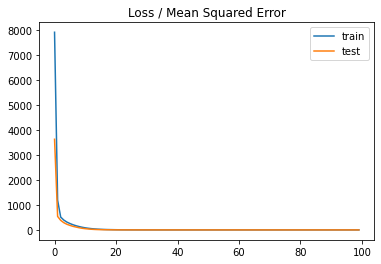

In [163]:
from matplotlib import pyplot
#plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.legend()
pyplot.show()

In [164]:
# Close database connection
conn.commit()
conn.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')